# 1. Basic execution of the eco-evolutionary model

A simple example showcasing how to execute the eco-evolutionary model **without coupling** it to FastScape.

## Import libraries

As the first step, we need to import a few standard Python library to manipulate arrays ([numpy](https://numpy.org/)), to plot results ([matplotlib](https://matplotlib.org/)) and a couple of custoum-made funtions or methods we build to encapsulate the execution of a single model run (**single_model_run**) and show the results into two type of plots. The custoum-made functions can be imported from the file **extra_func.py**. The documentation of each function can be acessed by typing the function name together with the question mark: 

```python
extra.single_model_run?
```

In [1]:
import numpy as np
import extra_func as ext
import matplotlib.pyplot as plt

%matplotlib inline

## Build a simple environmental field

First, we build the 2D environmental field. For this, we use [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to create an environmental gradient that linearly increases along the x coordinate.

In [2]:
length = (250, 250)
spacing = (1, 1)

x, y = np.meshgrid(*[np.arange(0, l+s, s) for l, s in zip(length, spacing)])

environment = x * 10

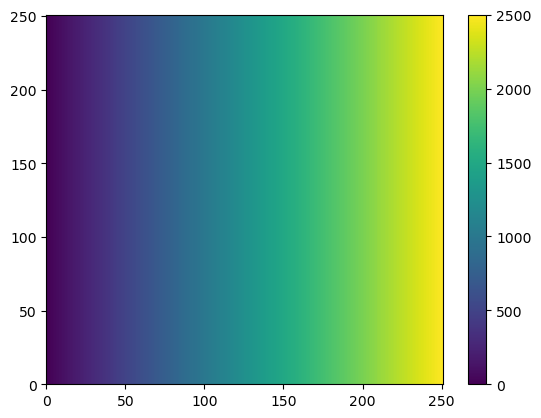

In [3]:
plt.pcolormesh(environment)
plt.colorbar()

## Speciation model without trait-mediated competition

To execute a run simply we call the method **model_run**, modify parameter values as requiered and store the result in a data frame **df1** for futher analysis. The [Python magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) **%time** is a function to time the execution of the run and it is not essential for the execution of a model.

In [4]:
%time df1 = ext.single_model_run(environment, x, y)
df1

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 50
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 1.0

CPU times: user 4.41 s, sys: 2.57 s, total: 6.98 s
Wall time: 4.63 s


,step,time,dt,x,y,taxon_id,ancestor_id,n_offspring,fitness,n_all,n_eff,trait_0
0,0,0.0,0.0,244.174942,110.251531,1.0,0.0,4,0.077610,1,1.000000,0.500000
1,0,0.0,0.0,95.048934,152.467702,1.0,0.0,14,0.850059,3,3.000000,0.500000
2,0,0.0,0.0,230.811558,215.905324,1.0,0.0,7,0.131586,1,1.000000,0.500000
3,0,0.0,0.0,65.423106,215.939418,1.0,0.0,7,0.522150,4,4.000000,0.500000
4,0,0.0,0.0,79.774265,168.720328,1.0,0.0,9,0.693841,4,4.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
406,499,499.0,0.0,159.355953,218.777816,1187.0,1184.0,1,0.826803,35,34.231784,0.752549
407,499,499.0,0.0,204.848062,219.678353,1187.0,1184.0,1,0.992816,53,52.600997,0.779984
408,499,499.0,0.0,196.827236,233.565089,1187.0,1184.0,1,0.999491,44,43.715251,0.779984
409,499,499.0,0.0,173.932079,249.299434,1187.0,1184.0,2,0.895885,25,24.444669,0.779984


The first type of plot shows the distribution of organims at selected time steps (**plot_spatial_dist**).

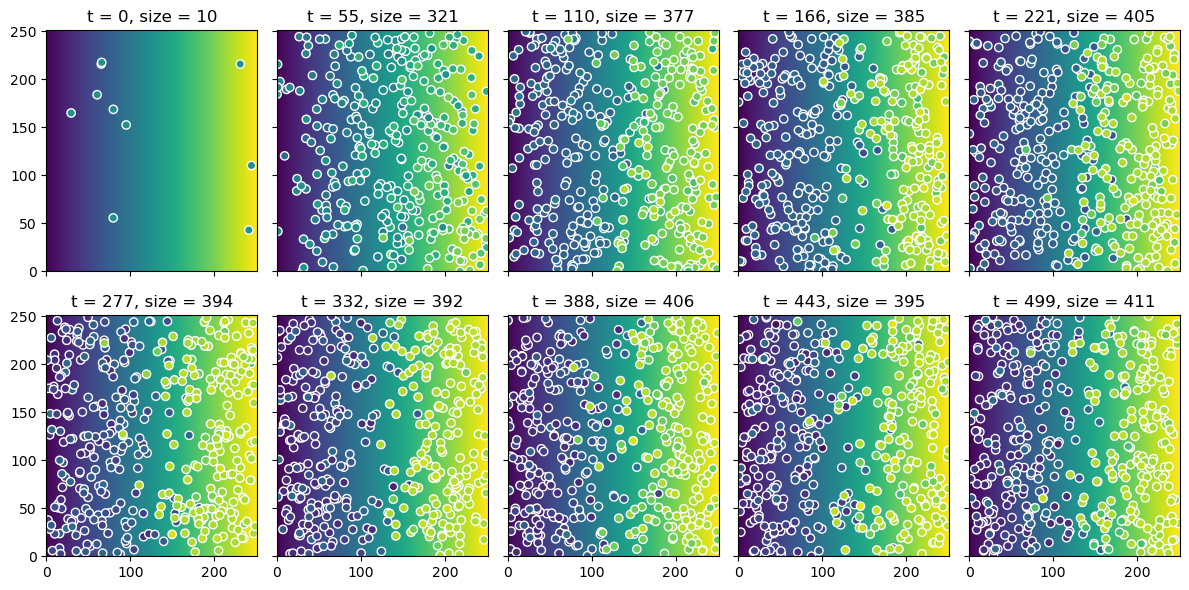

In [5]:
ext.plot_spatial_dist_ind(df1, environment)

The second type of plot shows  **plot_sol** the abundance of individuals and trait distribution (as 2d histogram, where darker color means higher frequencies/number of observations) over time, together with the spatial location of individuals and trait distribution along the x-coordinate at the last time step.

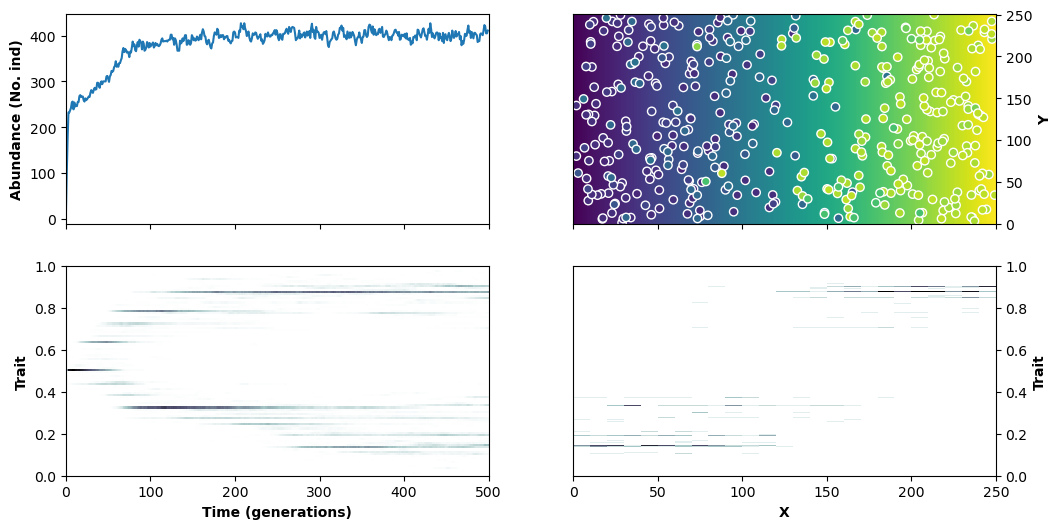

In [6]:
ext.plot_temp_dyn_1trait(df1, environment, x)

## Speciation model with trait-mediated competition

Then we can vary the parameters values to show, for example, the impact of trait-mediated competition on the trait dynamics

In [7]:
%time df2 = ext.single_model_run(environment, x, y, sigma_u=0.20, K=30)
df2

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 30
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 0.2

CPU times: user 2.91 s, sys: 1.03 s, total: 3.93 s
Wall time: 3.14 s


,step,time,dt,x,y,taxon_id,ancestor_id,n_offspring,fitness,n_all,n_eff,trait_0
0,0,0.0,0.0,244.174942,110.251531,1.0,0.0,2,0.077610,1,1.000000,0.500000
1,0,0.0,0.0,95.048934,152.467702,1.0,0.0,9,0.850059,3,3.000000,0.500000
2,0,0.0,0.0,230.811558,215.905324,1.0,0.0,4,0.131586,1,1.000000,0.500000
3,0,0.0,0.0,65.423106,215.939418,1.0,0.0,4,0.522150,4,4.000000,0.500000
4,0,0.0,0.0,79.774265,168.720328,1.0,0.0,5,0.693841,4,4.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
344,499,499.0,0.0,183.630908,108.646345,2407.0,2399.0,1,0.640750,44,31.104136,0.912904
345,499,499.0,0.0,198.085931,147.631608,2407.0,2399.0,1,0.794917,48,34.313098,0.912904
346,499,499.0,0.0,217.960048,199.683453,2407.0,2399.0,1,0.956706,43,33.887496,0.912904
347,499,499.0,0.0,196.989594,195.620469,2407.0,2399.0,1,0.784608,54,39.064872,0.912904


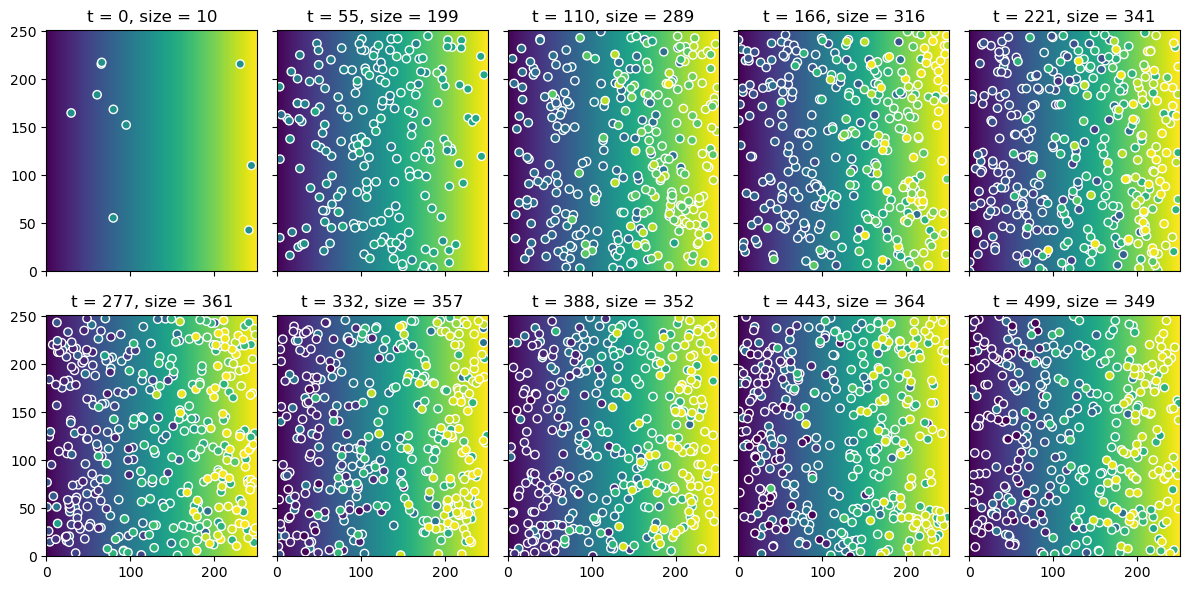

In [8]:
ext.plot_spatial_dist_ind(df2, environment)

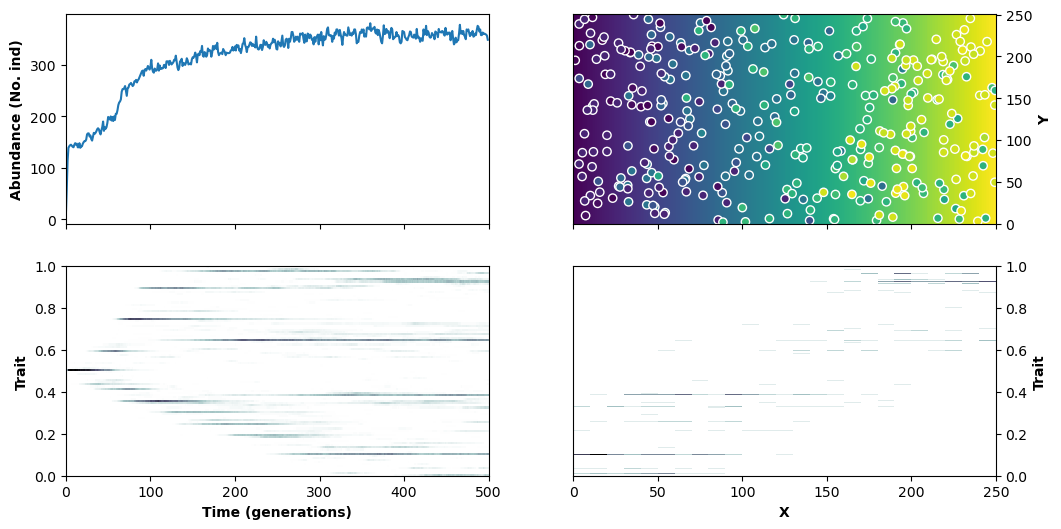

In [9]:
ext.plot_temp_dyn_1trait(df2, environment, x)